Źródło danych:
https://www.kaggle.com/datasets/shivam2503/diamonds?resource=download

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/janszopa/Narzedzie_do_wyceny_produktow/main/diamonds.csv")
data = data.drop(columns = ['Unnamed: 0'])
print("l.obiektów: ", data.shape[0], "\nl.atrybutów: ", data.shape[1])
data

l.obiektów:  53940 
l.atrybutów:  10


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [29]:
data.info()
print("\nBraki w danych:\n",data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB

Braki w danych:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [30]:
#Nie widzimy żadnych braków w badanych danych.

In [31]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [32]:
#Zauważamy pewną anomalię przy wartościach minimalnych, występują diamenty o wymiarach x,y,z równych 0. 

In [33]:
invalidData=data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]
print("Liczba niepoprwanych danych: ", invalidData.shape[0])
invalidData

Liczba niepoprwanych danych:  20


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [34]:
#Liczba wadliwych danych w porównaniu do całego zbioru jest bardzo mała. 
#Do dalszej analizy zwyczajnie je usuwam.
data=data[(data[['x','y','z']] != 0).all(axis=1)]

#Sprawdzam czy liczba obiektów zmniejszyła się dokładnie o 20
#oraz czy w wartościach min x,y,z nie występuje już 0
print("l.obiektów: ", data.shape[0])
data.describe()

l.obiektów:  53920


,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [35]:
#Wszystko się zgadza

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='clarity', ylabel='price'>

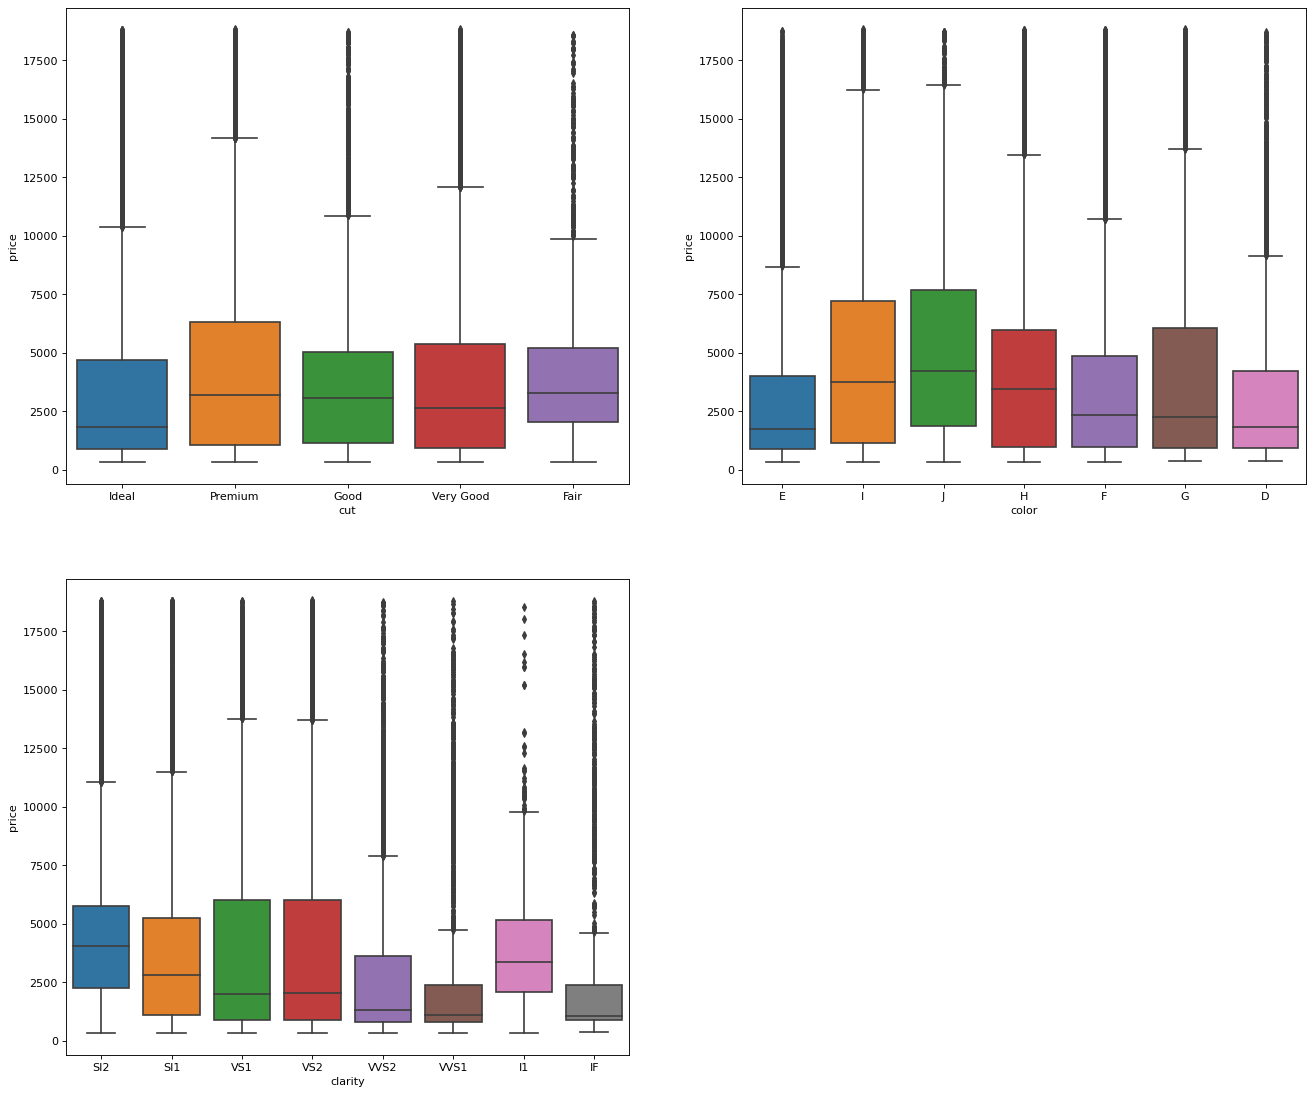

In [46]:
plt.figure(figsize=(20,17), dpi= 80)
plt.subplot(2,2,1)
sns.boxplot(x=data['cut'] , y=data['price'])
plt.subplot(2,2,2)
sns.boxplot(x=data['color'] , y=data['price'])
plt.subplot(2,2,3)
sns.boxplot(x=data['clarity'] , y=data['price'])

In [49]:
#Do udoskonalenia

'''
zamiana na atrybuty ilościowe
cut: Ideal -> 2
     Premium -> 3 
color:  
     
clarity
'''
label_encoder = LabelEncoder()
data['cut'] = label_encoder.fit_transform(data['cut'])
data['color'] = label_encoder.fit_transform(data['color'])
data['clarity'] = label_encoder.fit_transform(data['clarity'])
data

/var/folders/s8/mvh2jtyn2nl4n22gr3hry3qw0000gn/T/ipykernel_7801/3029540085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cut'] = label_encoder.fit_transform(data['cut'])
/var/folders/s8/mvh2jtyn2nl4n22gr3hry3qw0000gn/T/ipykernel_7801/3029540085.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = label_encoder.fit_transform(data['color'])
/var/folders/s8/mvh2jtyn2nl4n22gr3hry3qw0000gn/T/ipykernel_7801/3029540085.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [52]:
#Budowa modelu

#Odzielenie ceny od reszty atrybutów
x = data.drop(columns = ['price'])
y = data['price']

#Podział na zbiór uczący i testowy
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#Standaryzacja danych
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Tworzenie i trenowanie modelu regresji liniowej
linReg = LinearRegression()
linReg.fit(x_train , y_train)

#predykcje na podstawie zbioru testowego
y_pred = linReg.predict(x_test)


#Ocena
r2 = r2_score(y_test, y_pred)
print('Linear Regression R2: ', r2)

Linear Regression R2:  0.8802593248626912
